In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'train.csv'
df = pd.read_csv(archivo)
archivo2 = "IBM HR Data new.csv"
df2 = pd.read_csv(archivo2)


C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\759001633.py:8: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(archivo2)


## Deserción Laboral
### El dataser que se analiza se centra en la deserción de empleados en las empresas. Este estudio se lleva a cabo con el objetivo de encontrar las razones de dichas renuncias y encontrar una posible solución para poder evitar estos acontecimiento. Se analizarán diferentes variables y situaciones para determinar un partrón o similitudes. Utilizaremos dos dataset diferentes por lo que primero deberemos realizar una etapa de limpieza de datos y reordenamiento de variables. Esta fusión de registros nos permitirá contar con mayores casos, pero para esto, debemos contar que concidan las columnas y los tipos de datos que contienen.

## Limpieza Dataset N°1

1- Renombramos las variables para mejor entendimiento

In [31]:
df = df.rename(columns={'Employee ID' : 'ID Empleado',
                        'Age' : 'Edad',
                        'Gender' : 'Género',
                        'Years at Company' : 'Antigüedad en la Empresa', 
                        'Job Role' : 'Rol de Trabajo', 
                        'Monthly Income' : 'Ingreso Mensual',
                        'Work-Life Balance' : 'Balance Trabajo-Vida',
                        'Job Satisfaction' : 'Satisfacción del Trabajo',
                        'Performance Rating' : 'Desempeño',
                        'Number of Promotions' : 'Número de Promociones',
                        'Overtime' : 'Horas Extras',
                        'Distance from Home' : 'Distancia a Casa',
                        'Education Level' : 'Nivel de Educación',
                        'Marital Status' : 'Estado Civil',
                        'Number of Dependents' : 'Número de Dependientes',
                        'Job Level' : 'Nivel de Trabajo',
                        'Company Size' : 'Tamaño de Empresa',
                        'Company Tenure' : 'Meses desde el último evento',
                        'Remote Work' : 'Trabajo Remoto',
                        'Leadership Opportunities' : 'Oportunidades de Liderazgo',
                        'Innovation Opportunities' : 'Oportunidades de Innovación',
                        'Company Reputation' : 'Reputación de la Empresa',
                        'Employee Recognition' : 'Reconocimiento a Empleado',
                        'Attrition' : 'Deserción'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID Empleado                   59598 non-null  int64 
 1   Edad                          59598 non-null  int64 
 2   Género                        59598 non-null  object
 3   Antigüedad en la Empresa      59598 non-null  int64 
 4   Rol de Trabajo                59598 non-null  object
 5   Ingreso Mensual               59598 non-null  int64 
 6   Balance Trabajo-Vida          59598 non-null  object
 7   Satisfacción del Trabajo      59598 non-null  object
 8   Desempeño                     59598 non-null  object
 9   Número de Promociones         59598 non-null  int64 
 10  Horas Extras                  59598 non-null  object
 11  Distancia a Casa              59598 non-null  int64 
 12  Nivel de Educación            59598 non-null  object
 13  Estado Civil    

### CARACTERÍSTICAS:
* ID Empleado: Un identificador único asignado a cada empleado.
* Edad: La edad del empleado, que varía entre 18 y 60 años.
* Género: El género del empleado.
* Antigüedad en la Empresa: El número de años que el empleado ha trabajado en la empresa.
* Ingreso Mensual: El salario mensual del empleado, en dólares.
* Rol de Trabajo: El departamento o rol en el que trabaja el empleado, codificado en categorías como Finanzas, Salud, Tecnología, Educación y Medios.
* Balance Trabajo-Vida: La percepción del empleado sobre el equilibrio entre el trabajo y la vida personal: (Malo, Por debajo del promedio, Bueno, Excelente).
* Satisfacción Laboral: La satisfacción del empleado con su trabajo: (Muy Baja, Baja, Media, Alta).
* Desempeño: La calificación del desempeño del empleado: (Baja, Por debajo del promedio, Promedio, Alta).
* Número de Promociones: El número total de promociones que ha recibido el empleado.
* Distancia a Casa: La distancia entre la casa del empleado y el lugar de trabajo, en millas.
* Nivel de Educación: El nivel educativo más alto alcanzado por el empleado: (Secundaria, Grado Asociado, Licenciatura, Maestría, Doctorado).
* Estado Civil: El estado civil del empleado: (Divorciado, Casado, Soltero).
* Número de Dependientes: El número de empleados dependientes.
* Nivel de Trabajo: El nivel de trabajo del empleado: (Junior, Medio, Senior).
* Tamaño de la Empresa: El tamaño de la empresa en la que trabaja el empleado: (Pequeña, Mediana, Grande).
* Meses desde el último evento: El número total de años que el empleado ha trabajado en la industria.
* Trabajo Remoto: Si el empleado trabaja de forma remota: (Sí o No).
* Oportunidades de Liderazgo: Si el empleado tiene oportunidades de liderazgo: (Sí o No).
* Oportunidades de Innovación: Si el empleado tiene oportunidades de innovación: (Sí o No).
* Reputación de la Empresa: La percepción del empleado sobre la reputación de la empresa: (Muy Mala, Mala, Buena, Excelente).
* Reconocimiento a Empleado: El nivel de reconocimiento que recibe el empleado: (Muy Bajo, Bajo, Medio, Alto).
* Deserción: Si el empleado ha dejado la empresa, codificado como 0 (se quedó) y 1 (se fue).

In [33]:
empleadosmenores= df[(df["Edad"] - df["Antigüedad en la Empresa"]) < 16]
empleadosmenores

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Meses desde el último evento,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
12,21896,47,Female,38,Technology,9039,Fair,Very High,High,1,...,0,Entry,Small,68,No,No,No,Good,Low,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,16024,23,Male,10,Healthcare,8143,Fair,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,Medium,Left
59592,44132,38,Male,23,Finance,10351,Excellent,Medium,Below Average,2,...,4,Entry,Small,54,No,No,No,Poor,Medium,Stayed
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed


In [34]:
df = df.drop(empleadosmenores.index)
df

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Meses desde el último evento,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59585,59736,56,Male,16,Technology,11048,Good,Low,Average,1,...,2,Entry,Medium,25,No,No,No,Good,Medium,Left
59588,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
59591,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left


In [35]:
salud = df[(df["Rol de Trabajo"] == "Healthcare") & ((df["Edad"] - df["Antigüedad en la Empresa"]) < 18)]
salud

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Meses desde el último evento,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
123,11385,19,Male,3,Healthcare,7979,Fair,Medium,Low,1,...,2,Entry,Medium,27,No,No,Yes,Fair,Medium,Left
203,32586,22,Male,5,Healthcare,9117,Good,High,Below Average,0,...,4,Mid,Small,34,No,No,No,Excellent,Medium,Stayed
311,58293,46,Male,29,Healthcare,6468,Poor,Medium,Average,2,...,3,Mid,Medium,72,Yes,No,No,Good,Medium,Stayed
323,63805,30,Male,13,Healthcare,9321,Fair,Very High,Average,1,...,0,Entry,Small,51,No,No,No,Good,Low,Left
363,58005,24,Male,8,Healthcare,7677,Fair,High,Average,1,...,3,Senior,Small,31,No,No,No,Fair,High,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59426,67864,27,Male,10,Healthcare,7485,Fair,Medium,High,2,...,0,Entry,Medium,53,Yes,No,No,Good,Low,Left
59441,67173,18,Male,1,Healthcare,8252,Fair,High,Average,0,...,3,Senior,Medium,77,No,No,Yes,Good,Medium,Stayed
59460,9475,26,Female,10,Healthcare,8629,Fair,Medium,Average,3,...,4,Senior,Medium,33,No,No,No,Good,Low,Stayed
59507,22663,30,Female,13,Healthcare,8787,Good,High,Low,1,...,2,Senior,Large,15,No,No,No,Poor,High,Stayed


In [36]:
df = df.drop(salud.index)
df

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Meses desde el último evento,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59585,59736,56,Male,16,Technology,11048,Good,Low,Average,1,...,2,Entry,Medium,25,No,No,No,Good,Medium,Left
59588,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
59591,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left


## Explicación de la Limpieza
En esta instancia se eliminaron un total de 20145 registros de 59598 que presentaban una incongruencia entre las variables de Edad y Antigüedad en la Empresa, estos indicaban que los empleados iniciaron sus actividades teniendo menos de 16 años, lo cual es imposibles o al menos no es permitido legalmente. También se realizó una segunda depuración que involucra las variables anteriormente mencionadas, pero ahora con un limite de 18 años, y el dato Healthcare de la variable Rol de Trabajo. Se basa en que un trabajador del área de salud no puede inicar con menos de 18 años en el ambito laboral ya que, desde nuestro entendimiento, no cuenta con los conocimientos básico requeridos que te puede brindar una carrera terciaria o universitaria específica del área, debido a que no es una rama que pueda ser estudiada de forma autodidácta. Por esa razón se decidió contemplarlos con el límite que se menciona para que se pueda comprender su incorporación como pasantes con al menos un año de estudios y con los saberes necesarias.

## Concatenación
Debido a la eliminación del 33,8% del Dataset original, se presento la idea de concatenarlo con otra base de datos de la misma temática. Esto nos permite mantener un porcentaje de acierto en el análisis de la muestra y no perdernos de información valiosa. Este nuevo Dataset tendrá que pasar por un proceso de limpieza y ordenamiento para que coincidan con nuestras variables y valores planteados anteriormente.

## Limpieza Dataset N°2

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

1- Eliminamos las variables que no nos son útilies

In [38]:
df2 = df2.drop(['BusinessTravel', 'DailyRate', 'Department', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Employee Source' ], axis=1)

2- Renombramos las variables para mejor entendimiento

In [39]:
df2 = df2.rename(columns={'Application ID' : 'ID Empleado',
                        'Age' : 'Edad',
                        'Gender' : 'Género',
                        'YearsAtCompany' : 'Antigüedad en la Empresa', 
                        'JobRole' : 'Rol de Trabajo', 
                        'MonthlyIncome' : 'Ingreso Mensual',
                        'WorkLifeBalance' : 'Balance Trabajo-Vida',
                        'JobSatisfaction' : 'Satisfacción del Trabajo',
                        'PerformanceRating' : 'Desempeño',
                        'OverTime' : 'Horas Extras',
                        'DistanceFromHome' : 'Distancia a Casa',
                        'Education' : 'Nivel de Educación',
                        'MaritalStatus' : 'Estado Civil',
                        'JobLevel' : 'Nivel de Trabajo',
                        'YearsSinceLastPromotion' : 'Meses desde el último evento',
                        'Attrition' : 'Deserción'})

3- Añadimos las variables faltantes y completamos con datos aquellas que que tengan los mismos valores.

In [40]:
df2[['Número de Promociones', 'Número de Dependientes', 'Trabajo Remoto', 'Oportunidades de Liderazgo', 'Oportunidades de Innovación', 'Reconocimiento a Empleado']] = None
df2['Tamaño de Empresa'] = 'Large'
df2['Reputación de la Empresa'] = 'Excellent'

4- Ordenamos las columnas para que coincidan con el Dataset N°1

In [41]:
columnasordenadas = ['ID Empleado', 'Edad', 'Género', 'Antigüedad en la Empresa', 'Rol de Trabajo', 'Ingreso Mensual', 'Balance Trabajo-Vida', 'Satisfacción del Trabajo', 'Desempeño','Número de Promociones' ,'Horas Extras', 'Distancia a Casa', 'Nivel de Educación', 'Estado Civil','Número de Dependientes' ,'Nivel de Trabajo','Tamaño de Empresa' ,'Meses desde el último evento', 'Trabajo Remoto', 'Oportunidades de Liderazgo', 'Oportunidades de Innovación','Reputación de la Empresa' ,'Reconocimiento a Empleado', 'Deserción']
df2 = df2[columnasordenadas]

5- Reemplazamos y completamos los valores de las columnas. 
Se eliminan los pocos registros que contienen valores perdidos.


In [42]:
df2['Género'] = df2['Género'].replace({1 : 'Female', 2 : 'Male'})
df2['Rol de Trabajo'] = df2['Rol de Trabajo'].replace({4 : 'Laboratory Technician', 5 : 'Research Scientist'})
df2['Balance Trabajo-Vida'] = df2['Balance Trabajo-Vida'].replace({1 : 'Poor', 2 : 'Fair', 3 : 'Good', 4 : 'Excellent'})
df2['Satisfacción del Trabajo'] = df2['Satisfacción del Trabajo'].replace({'1' : 'Low', '2' : 'Medium', '3' : 'High', '4': 'Very High'})
df2['Desempeño'] = df2['Desempeño'].replace({11 : 'Low', 13 : 'Below Average', 3 : 'Average', 4 : 'High'})
df2['Número de Promociones'] = df2['Número de Promociones'].fillna(0)
df2['Número de Promociones'] = df2['Número de Promociones'].replace({0 : 1})
df2['Horas Extras'] = df2['Horas Extras'].replace({'Y': 'Yes'})
df2['Nivel de Educación'] = df2['Nivel de Educación'].replace({1 : 'High School', 2 : 'Associate Degree', 3 : 'Bachelor’s Degree', 4 : 'Master’s Degree', 5 : 'PhD', 6 : 'PhD'})
df2['Estado Civil'] = df2['Estado Civil'].replace({4 : 'Single'})
df2['Número de Dependientes'] = df2['Número de Dependientes'].fillna(0)
df2['Número de Dependientes'] = df2['Número de Dependientes'].replace({0 : 1})
df2['Nivel de Trabajo'] = df2['Nivel de Trabajo'].replace({1 : 'Entry', 2 : 'Mid', 3 : 'Mid', 4 : 'Senior', 5 : 'Senior'})
df2['Meses desde el último evento'] = df2['Meses desde el último evento'].replace({0 : 1})
df2['Meses desde el último evento'] = df2['Meses desde el último evento'] * 12
df2['Trabajo Remoto'] = df2['Trabajo Remoto'].fillna(0)
df2['Trabajo Remoto'] = df2['Trabajo Remoto'].replace({0 : 'No'})
df2['Oportunidades de Liderazgo'] = df2['Oportunidades de Liderazgo'].fillna(0)
df2['Oportunidades de Liderazgo'] = df2['Oportunidades de Liderazgo'].replace({0 : 'No'})
df2['Oportunidades de Innovación'] = df2['Oportunidades de Innovación'].fillna(0)
df2['Oportunidades de Innovación'] = df2['Oportunidades de Innovación'].replace({0 : 'No'})
df2['Reconocimiento a Empleado'] = df2['Reconocimiento a Empleado'].fillna(0)
df2['Reconocimiento a Empleado'] = df2['Reconocimiento a Empleado'].replace({0 : 'Medium'})
df2['Deserción'] = df2['Deserción'].replace({'Current employee': 'Stayed', 'Voluntary Resignation': 'Left'})
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23319 entries, 0 to 23432
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Empleado                   23319 non-null  object 
 1   Edad                          23319 non-null  float64
 2   Género                        23319 non-null  object 
 3   Antigüedad en la Empresa      23319 non-null  float64
 4   Rol de Trabajo                23319 non-null  object 
 5   Ingreso Mensual               23319 non-null  object 
 6   Balance Trabajo-Vida          23319 non-null  object 
 7   Satisfacción del Trabajo      23319 non-null  object 
 8   Desempeño                     23319 non-null  object 
 9   Número de Promociones         23319 non-null  int64  
 10  Horas Extras                  23319 non-null  object 
 11  Distancia a Casa              23319 non-null  object 
 12  Nivel de Educación            23319 non-null  object 
 13  Estado

C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\2239102115.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Número de Promociones'] = df2['Número de Promociones'].fillna(0)
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\2239102115.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Número de Dependientes'] = df2['Número de Dependientes'].fillna(0)
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\2239102115.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version

6- Convertir las varibales con valores "cadena" a valores "numéricos"

In [43]:
df2['ID Empleado'] = pd.to_numeric(df2['ID Empleado'] , errors='coerce')
df2['Edad'] = pd.to_numeric(df2['Edad'] , errors='coerce')
df2['Antigüedad en la Empresa'] = pd.to_numeric(df2['Antigüedad en la Empresa'], errors='coerce')
df2['Ingreso Mensual'] = pd.to_numeric(df2['Ingreso Mensual'], errors='coerce')
df2['Número de Promociones'] = pd.to_numeric(df2['Número de Promociones'], errors='coerce')
df2['Distancia a Casa'] = pd.to_numeric(df2['Distancia a Casa'], errors='coerce')
df2['Número de Dependientes'] = pd.to_numeric(df2['Número de Dependientes'], errors='coerce')
df2['Meses desde el último evento'] = pd.to_numeric(df2['Meses desde el último evento'], errors='coerce')
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23315 entries, 0 to 23432
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Empleado                   23315 non-null  float64
 1   Edad                          23315 non-null  float64
 2   Género                        23315 non-null  object 
 3   Antigüedad en la Empresa      23315 non-null  float64
 4   Rol de Trabajo                23315 non-null  object 
 5   Ingreso Mensual               23315 non-null  float64
 6   Balance Trabajo-Vida          23315 non-null  object 
 7   Satisfacción del Trabajo      23315 non-null  object 
 8   Desempeño                     23315 non-null  object 
 9   Número de Promociones         23315 non-null  int64  
 10  Horas Extras                  23315 non-null  object 
 11  Distancia a Casa              23315 non-null  float64
 12  Nivel de Educación            23315 non-null  object 
 13  Estado

7- Convertir las variables de tipo "float" a "int"

In [44]:
df2['ID Empleado'] = df2['ID Empleado'].astype(int)
df2['Edad'] = df2['Edad'].astype(int)
df2['Antigüedad en la Empresa'] = df2['Antigüedad en la Empresa'].astype(int)
df2['Ingreso Mensual'] = df2['Ingreso Mensual'].astype(int)
df2['Número de Promociones'] = df2['Número de Promociones'].astype(int)
df2['Distancia a Casa'] = df2['Distancia a Casa'].astype(int)
df2['Número de Dependientes'] = df2['Número de Dependientes'].astype(int)
df2['Meses desde el último evento'] = df2['Meses desde el último evento'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23315 entries, 0 to 23432
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID Empleado                   23315 non-null  int64 
 1   Edad                          23315 non-null  int64 
 2   Género                        23315 non-null  object
 3   Antigüedad en la Empresa      23315 non-null  int64 
 4   Rol de Trabajo                23315 non-null  object
 5   Ingreso Mensual               23315 non-null  int64 
 6   Balance Trabajo-Vida          23315 non-null  object
 7   Satisfacción del Trabajo      23315 non-null  object
 8   Desempeño                     23315 non-null  object
 9   Número de Promociones         23315 non-null  int64 
 10  Horas Extras                  23315 non-null  object
 11  Distancia a Casa              23315 non-null  int64 
 12  Nivel de Educación            23315 non-null  object
 13  Estado Civil         

8- Concatenar los dos Dataset

In [45]:
dfconcatenado = pd.concat([df, df2], axis=0, ignore_index=True)
dfconcatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62768 entries, 0 to 62767
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID Empleado                   62768 non-null  int64 
 1   Edad                          62768 non-null  int64 
 2   Género                        62768 non-null  object
 3   Antigüedad en la Empresa      62768 non-null  int64 
 4   Rol de Trabajo                62768 non-null  object
 5   Ingreso Mensual               62768 non-null  int64 
 6   Balance Trabajo-Vida          62768 non-null  object
 7   Satisfacción del Trabajo      62768 non-null  object
 8   Desempeño                     62768 non-null  object
 9   Número de Promociones         62768 non-null  int64 
 10  Horas Extras                  62768 non-null  object
 11  Distancia a Casa              62768 non-null  int64 
 12  Nivel de Educación            62768 non-null  object
 13  Estado Civil    

## Dataset Final
Luego de completar la etapa de limpieza de datos y el ordenamiento de las variables de ambos Datasets, eliminando los registros con valores nulos e incluso mediante el cambio de valores o adición de los mismos, obtendremos una base unificada y con datos uniformados con el que podremos trabajar. También se realizó un cambio en el tipo de datos de las variables para facilitar el futuro análisis.

# Analisis Exploratorio de Datos

Cantidad de registros con el que se cuenta en el Dataset

In [46]:
total_empleado = dfconcatenado.shape[0]
total_empleado

62768

### ¿Cuál es el grado de deserción en la empresa?

In [18]:
desertores = dfconcatenado['Deserción'].value_counts()
desertores

Deserción
Stayed    40245
Left      22523
Name: count, dtype: int64

C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\562042627.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_porcentajes.index, y=desercion_porcentajes.values, palette="Blues_d")


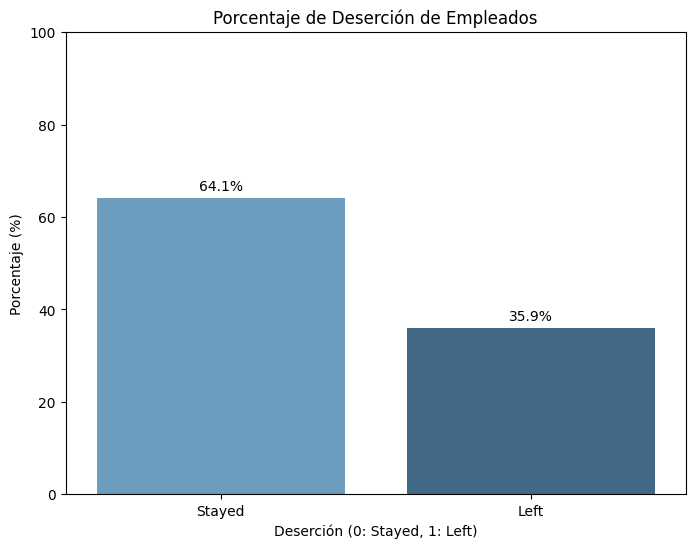

In [19]:
diccionario = {'Left' : 1 , 'Stayed' : 0}
binario = dfconcatenado['Deserción'].map(diccionario)

desercion_counts = binario.value_counts(normalize=True) * 100  
desercion_porcentajes = desercion_counts.sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=desercion_porcentajes.index, y=desercion_porcentajes.values, palette="Blues_d")

plt.xlabel('Deserción (0: Stayed, 1: Left)')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Deserción de Empleados')
plt.ylim(0, 100) 
plt.xticks([0, 1], ['Stayed', 'Left'])

for i, value in enumerate(desercion_porcentajes):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom')

Como se puede observar en la gráfica, el 35,9% de los empleados abandonan sus empresas. Esto no remarca una fuerte crisis de deserción pero si da a entender que poco menos de la mitad de los empleados se van a otras empresas o a trabajar por su propia cuenta, lo que nos generan las siguinetes preguntas:
* ¿Qué es lo que los motivó a desertar?
* ¿Cómo se puede evitar o al menos reducir el número de casos?

## Gráficos de Barra
Se realizan gráficos de barras de forma individual para cada variables de tipo objeto. Esto nos permitirá tener un vistazo previo de los datos y que variables nos brindan la información que buscamos.

C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\727209180.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\727209180.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\727209180.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\727209180.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

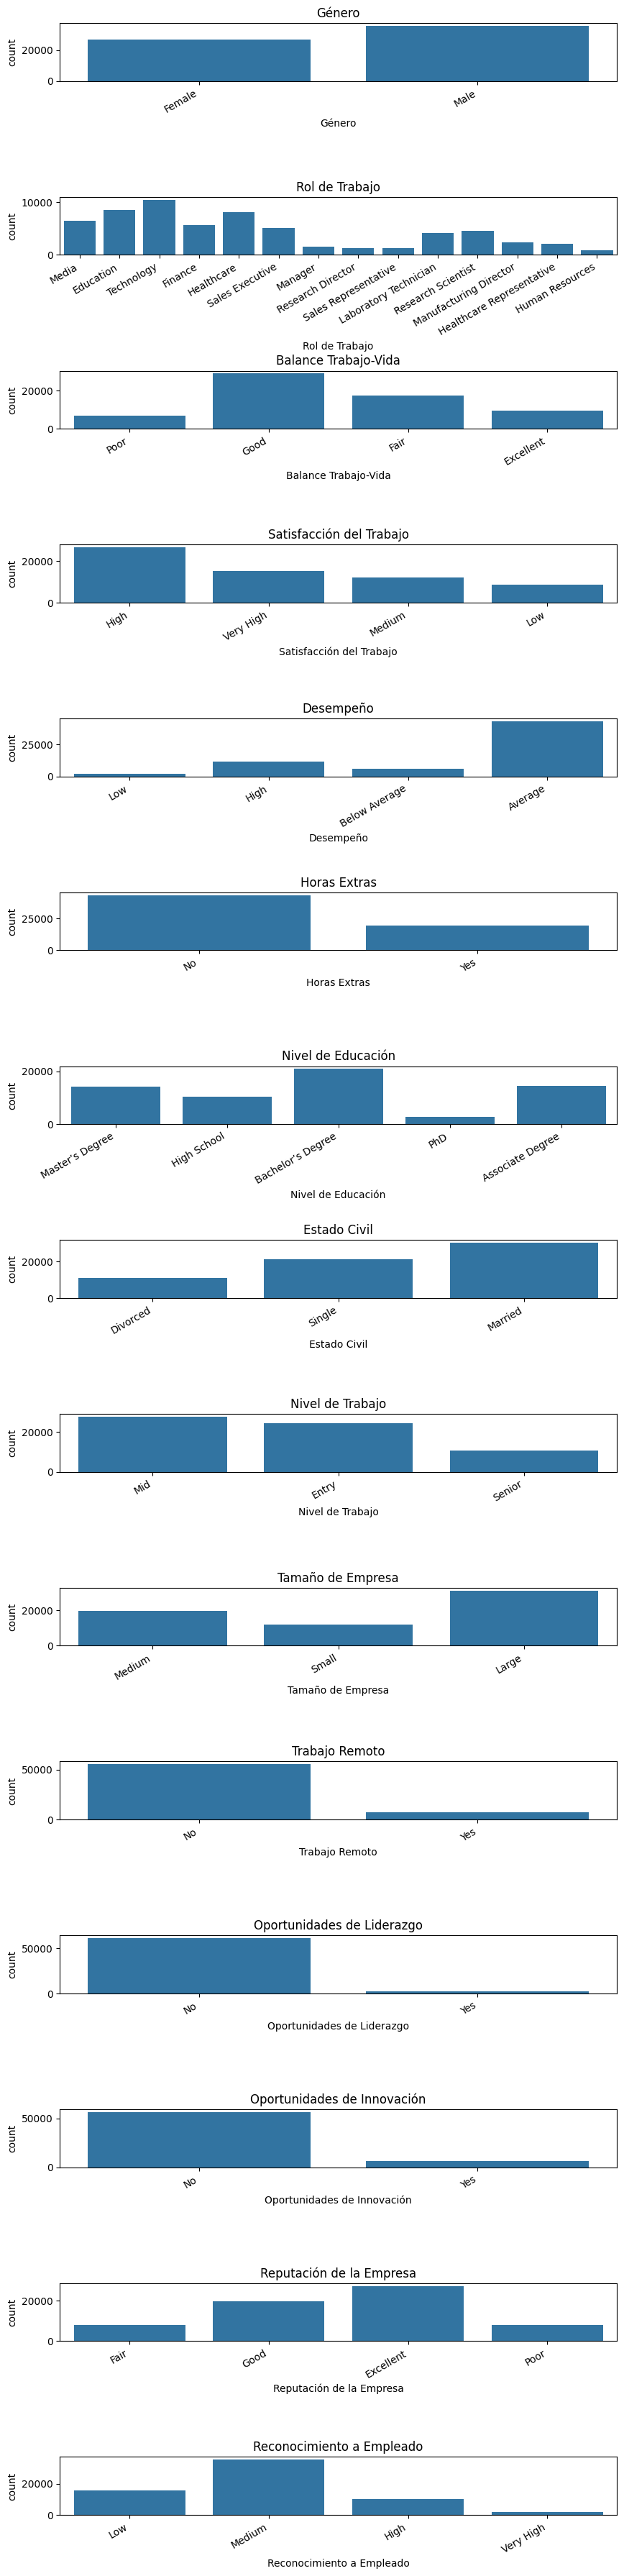

In [20]:
#Realizamos gráficos de barras para el análisis de cada variable tipo object de forma individual y determinar cuales son aquellas que son de nuestro
#interés para el análisis. 

col_cat = ['Género', 'Rol de Trabajo', 'Balance Trabajo-Vida', 'Satisfacción del Trabajo', 'Desempeño', 'Horas Extras', 'Nivel de Educación', 'Estado Civil', 
           'Nivel de Trabajo', 'Tamaño de Empresa', 'Trabajo Remoto', 'Oportunidades de Liderazgo', 'Oportunidades de Innovación', 'Reputación de la Empresa',
           'Reconocimiento a Empleado']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=dfconcatenado, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')

## Observaciones:
* Género: Se visualiza que el valor "Masculino" tiene una mínima diferencia positiva por lo que determina una mayor población masculina en el ambito laboral.
* Rol del trabajo: Hay 14 variables para determinar el trabajo de los empleados, la mayoria se encuentran en Tecnología seguido de Educación. Posteriormente se realizará un gráfico especifico para su estudio.
* Balance Trabajo-Vida: En el gráfico se persive claramente que los empleados pueden mantener una relación Buena entre su vida personal y el trabajo. Es notoria la diferencia por lo que se podría indagar más en detalle cuales son los empleados en específico que gozan de este balance.
* Satisfacción del Trabajo: Amplia diferencia entre el valor de satisfación Alta con los demás. A simple vista, los empleados estan conformes con sus trabajos y el ambiente en el que se encuentran.
* Desempeño: El desempeño de los empleados en lo general es Promedio, no suelen destacarse un su mayoría pero tampoco son ineficientes.
* Horas Extras: La mayoria no cuentan con horas extras, al parecer, solo el 33% aproximadamente pueden acceder a realizarlas.
* Nivel de educación: En esta variables, los valores tienden a estar más parejos, excepto por PhD. Destaca por sobre los demas el Bachiller, que para nosotros sería un título Medio-Superior.
* Estado Civil: Esta variable puede relacionarse con otras como con Balance Trabajo-Vida. Principalmente se indica que gran parte de los trabajadores se encuentran Casados.
* Nivel de Trabajo: En esta variables, se define el nivel y dificultad de obligaciones que tienen los empleados debido a su estatus dentro de la empresa. Aproximadamente el 80% de los trabajadores se encuentran en nivel de Ingresante y Medio, por una pequeña diferencia, mayormente Medio.
* Tamaño de Empresa: Los empleados manifestaron cual es el tamaño de la empresa en la que se encuntran. Al rededor de la mitad de ellos la definieron como un Gran Empresa.
* Trabajo Remoto: Esta variables es interesante de estudiar ya que al ser una modalidad actualmente en constante crecimiento, la mayoria de los empleados indicaron que no la realizan. Se desempeñaran futuros gráficos y combinaciones de variables para encontrar una razón a esta situación.
* Oportunidades de Liderazgo: Se puede visualizar que son muy pocos los empleados que pueden aspirar a liderar un sector o grupo de trabajo.
* Oportunidades de Innovación: Ocurre un evento idéntico al de la variable Oportunidad de Liderazgo, es escasa la cantidad de empleados que tienen esta oportunidad.
* Reputación de la Empresa: La mayoría de los trabajadores opinan que trabajan en empresas con una Excelente reputación, también hay otra gran parte que la denominan una Buena empresa. Son pocos los casos de empleados con una visión negativa de la empresa.
* Reconocimiento a Empleado: Tal como ocurre en la variable de Desempeño, los empleados determinan en su mayoría, que el reconocimiento a ellos es Moderado, no se les premia o recompensan sus acciones tan a menudo pero tampoco se los desestima o ignoran. 

In [21]:
dfconcatenado.describe()

,ID Empleado,Edad,Antigüedad en la Empresa,Ingreso Mensual,Número de Promociones,Distancia a Casa,Número de Dependientes,Meses desde el último evento
count,62768.000000,62768.000000,62768.000000,62768.000000,62768.000000,62768.000000,62768.000000,62768.000000
mean,73650.526558,39.754142,10.762283,6994.604225,0.891649,34.890406,1.406226,44.755544
std,50464.653030,10.670261,8.985170,3366.783897,0.790778,30.422354,1.270923,31.171375
min,2.000000,18.000000,0.000000,1009.000000,0.000000,1.000000,0.000000,2.000000
25%,29655.750000,31.000000,4.000000,4621.000000,0.000000,8.000000,1.000000,12.000000
50%,59432.000000,39.000000,8.000000,6513.000000,1.000000,25.000000,1.000000,40.000000
75%,131134.250000,49.000000,16.000000,8835.000000,1.000000,60.000000,2.000000,68.000000
max,146972.000000,60.000000,43.000000,19999.000000,4.000000,99.000000,6.000000,180.000000


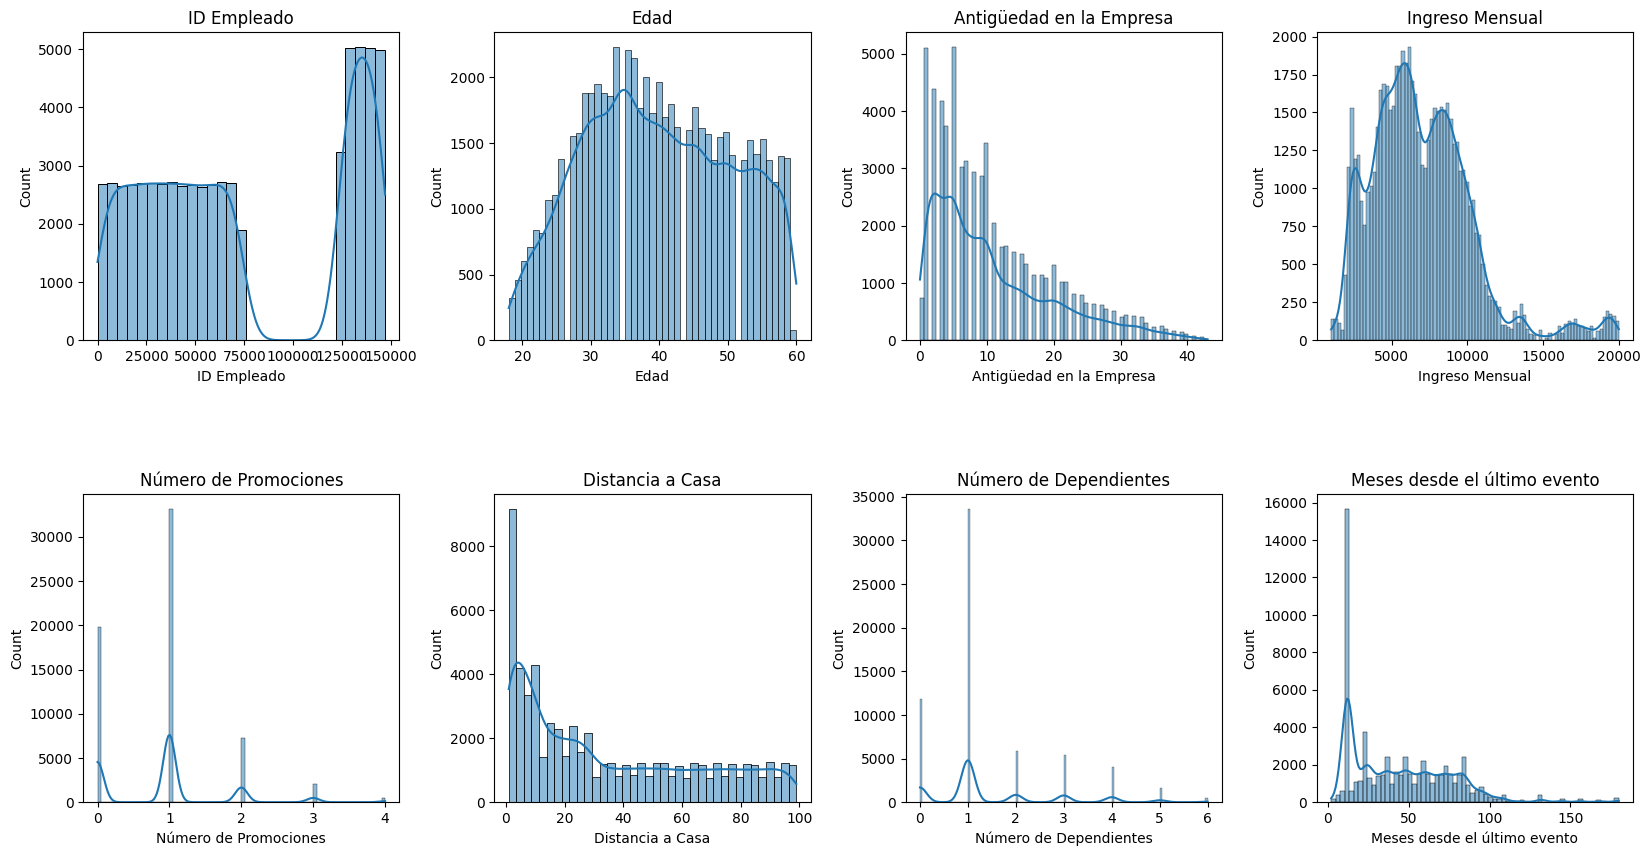

In [22]:
# Realizamos histogramas para el analisis y entendimiento de las variables numéricas con las que contamos.

col_num = ['ID Empleado', 'Edad', 'Antigüedad en la Empresa', 'Ingreso Mensual', 'Número de Promociones', 'Distancia a Casa', 'Número de Dependientes', 'Meses desde el último evento']

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(col_num):
    sns.histplot(x=col, data=dfconcatenado, ax=ax[i // 4, i % 4], kde = True)
    ax[i // 4, i % 4].set_title(col)
    ax[i // 4, i % 4].set_xlabel(col)

## Observaciones
* ID Empleado: En este gráfico se sugiere que los empleados podrían haber sido asignados con IDs en diferentes momentos o bajo diferentes esquemas de numeración. Sin embargo el ID no tiene importancia en el análisis en sí.
* Edad: La mayoría de los empleados se encuentran en un rango de edad joven a mediana. Hay una disminución en la cantidad de empleados mayores de 45 años, lo que podría indicar una tendencia de deserción o jubilación en edades más avanzadas.
* Antigüedad en la Empresa: La mayoría de los empleados son relativamente nuevos en la empresa, con pocos alcanzando más de 10 años de antigüedad. Esto podría indicar una alta rotación de personal o una estructura joven de la empresa.
* Ingreso Mensual: Esto sugiere que la mayoría de los empleados tienen ingresos en un rango 2000 a 12500, con una minoría que recibe sueldos más altos, posiblemente debido a diferencias en roles o niveles de experiencia.
* Número de Promociones: Esto podría indicar una estructura de promoción limitada, donde pocos empleados son promovidos. La falta de promoción podría estar relacionada con la deserción.
* Distancia a Casa: La mayoría de los empleados viven cerca de su lugar de trabajo, lo cual podría ser un factor positivo en la retención de empleados. La dispersión de valores sugiere que algunos empleados están dispuestos a desplazarse más lejos.
* Número de Dependientes: Esto podría indicar que los empleados tienen pocas responsabilidades familiares, lo cual puede influir en su estabilidad laboral y decisiones de deserción.
* Meses desde el último evento: La presencia de muchos empleados con eventos recientes podría reflejar una empresa dinámica, pero la presencia de outliers podría sugerir una falta de reconocimiento o oportunidades para ciertos empleados, lo cual podría llevar a la deserción.

## Análisis porcentual de decerción en relación con otras variables

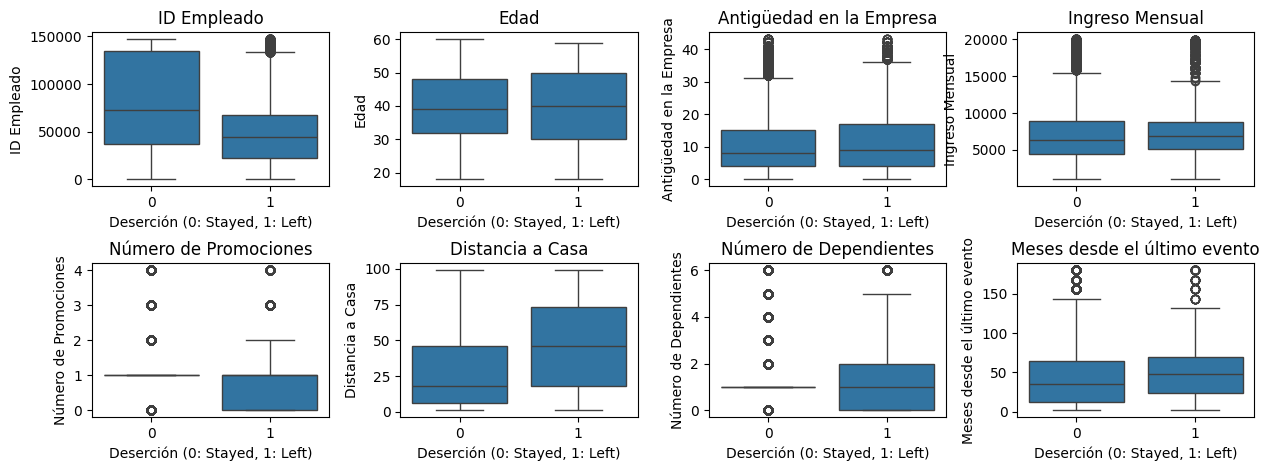

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(col_num):
    sns.boxplot(x=binario , y=col, data=dfconcatenado, ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xlabel('Deserción (0: Stayed, 1: Left)')
    ax[i // 4, i % 4].set_title(col) 

## Observaciones:
* Edad: Se observa que la mediana de edad para los empleados que se quedaron (0) es más alta en comparación con la de los que desertaron (1). Esto sugiere que los empleados más jóvenes tienden a desertar más.
* Antigüedad en la Empresa: La mediana de antigüedad en la empresa es menor para los empleados que desertaron (1). Además, se observan valores atípicos (outliers) en ambos grupos, lo que indica que hay empleados con muchos años en la empresa que también pueden desertar.
* Ingreso Mensual: No parece haber una diferencia significativa en los ingresos mensuales entre los empleados que se quedaron (0) y los que se fueron (1). Los outliers indican empleados con ingresos excepcionalmente altos en ambos grupos.
* Número de Promociones: Los empleados que se quedaron (0) tienen un rango de promociones más amplio, mientras que la mayoría de los que desertaron (1) no recibieron promociones o recibieron muy pocas. Esto sugiere que la falta de crecimiento profesional podría estar relacionada con la deserción.
* Distancia a Casa: Los empleados que se quedaron (0) tienen una menor distancia promedio a casa en comparación con los que desertaron (1). Esto podría indicar que un largo desplazamiento es un factor que contribuye a la deserción.
* Número de Dependientes: Los empleados que desertaron (1) tienden a tener más dependientes en comparación con los que se quedaron (0). Hay muchos outliers en el grupo que se quedó, lo que indica que hay empleados con un número excepcionalmente alto de dependientes que no desertan.
* Meses desde el último evento: La mediana es similar en ambos grupos, pero hay más outliers en el grupo que desertó (1). Esto sugiere que la falta de eventos significativos durante un tiempo prolongado podría estar relacionada con la deserción, aunque no es concluyente.

C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\1714903095.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporciones = dfconcatenado.groupby('Rangos de Edad')['binario'].mean() * 100
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\1714903095.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=proporciones.index, y=proporciones.values, ci=None, color="steelblue")


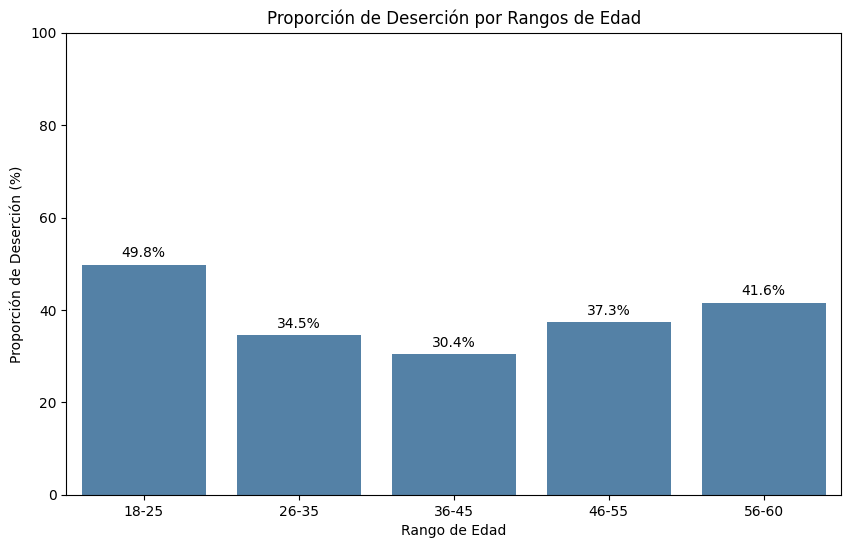

In [24]:
diccionario = {'Left': 1, 'Stayed': 0}
dfconcatenado['binario'] = dfconcatenado['Deserción'].map(diccionario)

bins = [18, 25, 35, 45, 55, 60]
rangos = ['18-25', '26-35', '36-45', '46-55', '56-60']
dfconcatenado['Rangos de Edad'] = pd.cut(dfconcatenado['Edad'], bins=bins, labels=rangos, right=False)

proporciones = dfconcatenado.groupby('Rangos de Edad')['binario'].mean() * 100
desercion_porcentajes = proporciones.sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=proporciones.index, y=proporciones.values, ci=None, color="steelblue")

plt.title('Proporción de Deserción por Rangos de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Proporción de Deserción (%)')
plt.ylim(0, 100)

for i, value in enumerate(desercion_porcentajes):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom')
    
plt.show()


En el gráfico anterior se puede observar los Rango de Edad de los empleados y cuales son más propensos a desertar. Esto es de nuestro interes ya que en base a este análisis podremos detectar, junto a otras variables, a los empleados que abandonan las empresas. La Edad es una variable muy importante que nos brinda un gran filtro para la predicción. Sabemos que el 49,8% de las personas de entre 18 a 25 años son propensos a desertar, lo cual, nos da a entender que los jovenes son el grupo de empleados con más rotaciones en el mercado laboral. Los siguen los trabajadores de 56 a 60 años con un 41,6%, esto se puede ocacionar por retiros voluntarios previos a jubilaciones, ya sea para mujeres de 60 años en adelante o 55 años para trabajos insalubres. Luego la tendencia de los demás grupos de edad se mantienen entre el 30% al 38%, estas edades corresponden a aquellos que tienen un trabajo estable o que no consideran prudente renunciar para cambiar por otra empresa, buscan la estabilidad y la adquisición de años o estatus en una empresa. 

C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\2183680588.py:114: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SatisfaccióndelTrabajo = dfconcatenado['Satisfacción del Trabajo'].replace(satisfaction_mapping)
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\2183680588.py:115: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Género = dfconcatenado['Género'].replace(gender_mapping)
C:\Users\fchia\AppData\Local\Temp\ipykernel_12824\2183680588.py:116: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

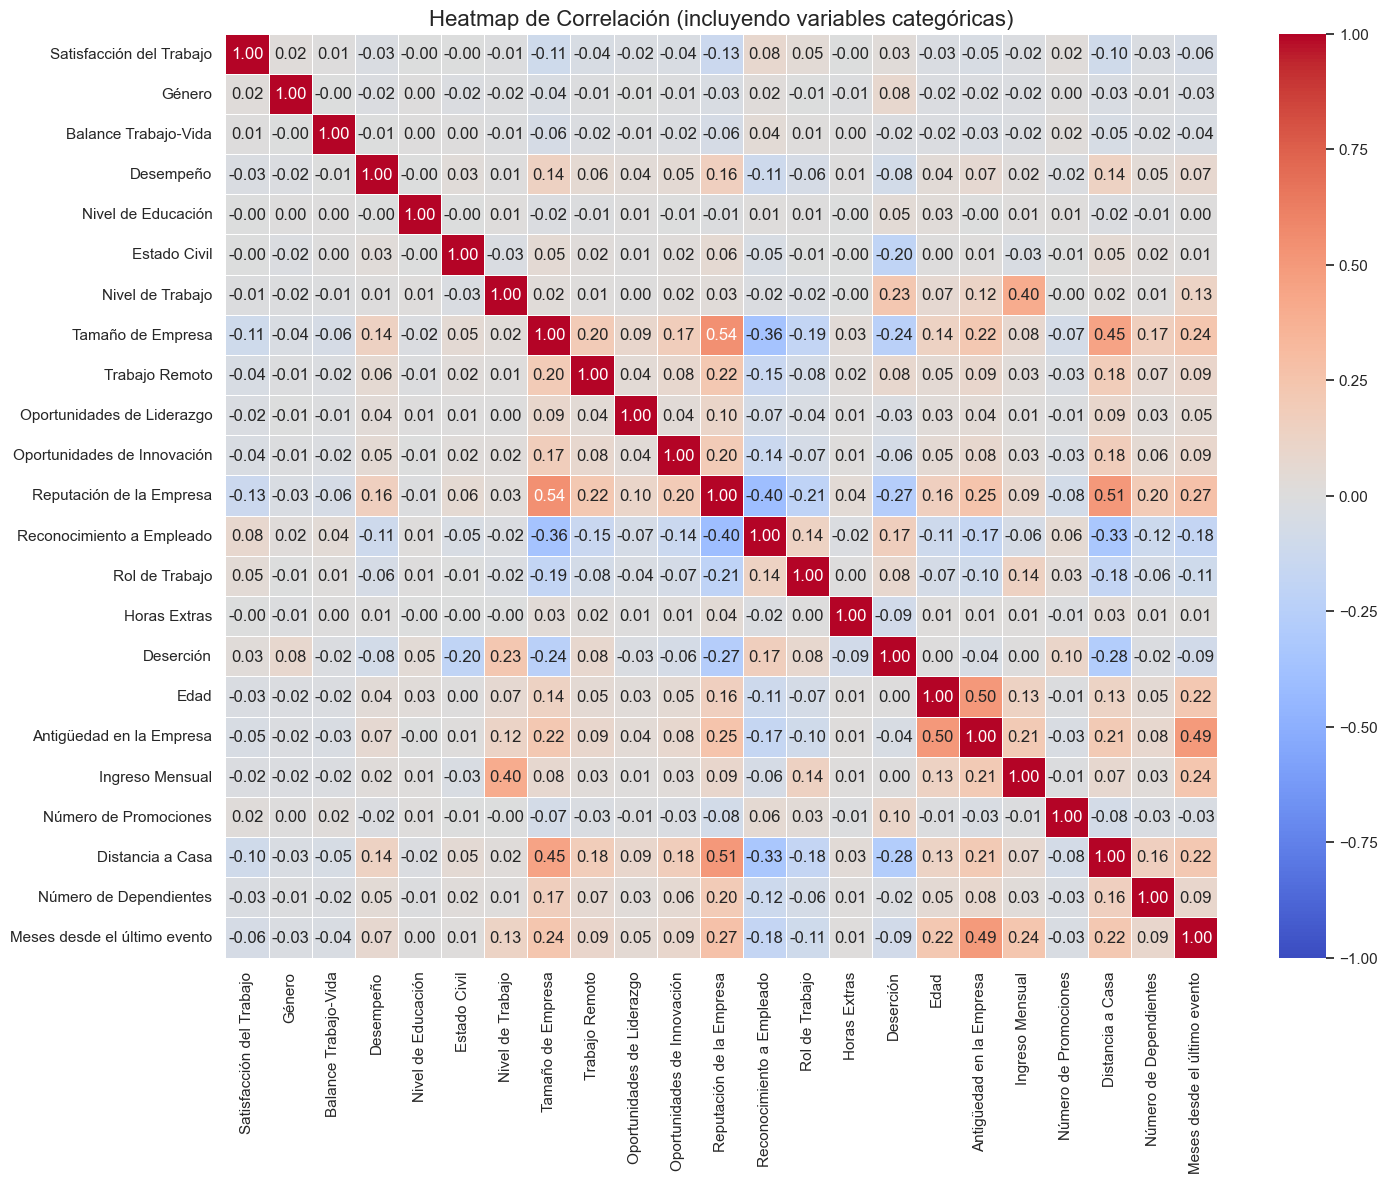

In [55]:
# Diccionario de mapeo para la conversión
# Mapeo para la codificación
gender_mapping = {
    'Male': 0,
    'Female': 1
}

balance_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

satisfaction_mapping = {
    'Very High': 0,
    'High': 1,
    'Medium': 2,
    'Low': 3
}

performance_mapping = {
    'Low': 0,
    'Below Average': 1,
    'Average': 2,
    'High': 3
}

education_mapping = {
    'High School': 0,
    'Associate Degree': 1,
    'Bachelor’s Degree': 2,
    'Master’s Degree': 3,
    'PhD': 4
}

marital_status_mapping = {
    'Divorced': 0,
    'Married': 1,
    'Single': 2
}

job_level_mapping = {
    'Mid': 0,
    'Entry': 1,
    'Senior': 2
}

company_size_mapping = {
    'Medium': 0,
    'Small': 1,
    'Large': 2
}

remote_work_mapping = {
    'Yes': 1,
    'No': 0
}

leadership_opportunity_mapping = {
    'Yes': 1,
    'No': 0
}

innovation_opportunity_mapping = {
    'Yes': 1,
    'No': 0
}

reputation_mapping = {
    'Fair': 0,
    'Good': 1,
    'Excellent': 2,
    'Poor': 3
}

recognition_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}

role_mapping = {
    'Media': 0,
    'Education': 1,
    'Technology': 2,
    'Finance': 3,
    'Healtcare': 4,
    'Sales Executive': 5,
    'Manager': 6,
    'Research Director': 7,
    'Sales Representative': 8,
    'Laboratory Technician': 9,
    'Research Scientist': 10,
    'Manofacturing Director': 11,
    'Healtcare Representative': 12,
    'Human Resources': 13


}

overtime_mapping = {
    'Yes': 1,
    'No': 0
}

resignation_mapping = {
    'Stayed': 0,
    'Left': 1  
}

# Aplicar el mapeo a la columna
SatisfaccióndelTrabajo = dfconcatenado['Satisfacción del Trabajo'].replace(satisfaction_mapping)
Género = dfconcatenado['Género'].replace(gender_mapping)
BalanceTrabajoVida = dfconcatenado['Balance Trabajo-Vida'].replace(balance_mapping)
Desempeño = dfconcatenado['Desempeño'].replace(performance_mapping)
NiveldeEducación = dfconcatenado['Nivel de Educación'].replace(education_mapping)
EstadoCivil = dfconcatenado['Estado Civil'].replace(marital_status_mapping)
NiveldeTrabajo = dfconcatenado['Nivel de Trabajo'].replace(job_level_mapping)
TamañodeEmpresa = dfconcatenado['Tamaño de Empresa'].replace(company_size_mapping)
TrabajoRemoto = dfconcatenado['Trabajo Remoto'].replace(remote_work_mapping)
OportunidadesdeLiderazgo = dfconcatenado['Oportunidades de Liderazgo'].replace(leadership_opportunity_mapping)
OportunidadesdeInnovación = dfconcatenado['Oportunidades de Innovación'].replace(innovation_opportunity_mapping)
ReputacióndelaEmpresa = dfconcatenado['Reputación de la Empresa'].replace(reputation_mapping)
ReconocimientoaEmpleado = dfconcatenado['Reconocimiento a Empleado'].replace(recognition_mapping)
RoldeTrabajo = dfconcatenado['Rol de Trabajo'].replace(role_mapping)
HorasExtras = dfconcatenado['Horas Extras'].replace(overtime_mapping)
Deserción = dfconcatenado['Deserción'].replace(resignation_mapping)
Edad = dfconcatenado ['Edad']
AntiguedadEnLaEmpresa = dfconcatenado ['Antigüedad en la Empresa']
IngresoMensual = dfconcatenado ['Ingreso Mensual']
NumeroDePromociones = dfconcatenado ['Número de Promociones']
DistanciaCasa = dfconcatenado ['Distancia a Casa']
NumeroDeDependientes = dfconcatenado ['Número de Dependientes']
MesesDesdUltEvento = dfconcatenado ['Meses desde el último evento']

# Seleccionar las columnas que deseas para la correlación
columns_to_count = [
    'Satisfacción del Trabajo', 'Género', 'Balance Trabajo-Vida', 'Desempeño', 'Nivel de Educación', 
    'Estado Civil', 'Nivel de Trabajo', 'Tamaño de Empresa', 'Trabajo Remoto', 'Oportunidades de Liderazgo', 
    'Oportunidades de Innovación', 'Reputación de la Empresa', 'Reconocimiento a Empleado', 'Rol de Trabajo', 
    'Horas Extras', 'Deserción', 'Edad', 'Antigüedad en la Empresa', 'Ingreso Mensual', 'Número de Promociones', 
    'Distancia a Casa', 'Número de Dependientes', 'Meses desde el último evento'
]

from sklearn.preprocessing import LabelEncoder

# Copiar solo las columnas seleccionadas
df_to_analyze = dfconcatenado[columns_to_count].copy()

# Convertir las columnas de tipo object a numérico usando LabelEncoder
label_encoder = LabelEncoder()
for column in df_to_analyze.select_dtypes(include=['object']).columns:
    df_to_analyze[column] = label_encoder.fit_transform(df_to_analyze[column])

# Calcular la matriz de correlación con todas las columnas convertidas
correlation_matrix = df_to_analyze.corr()

# Graficar el heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap de Correlación (incluyendo variables categóricas)', fontsize=16)
plt.show()


## Observaciones
### Correlaciones positivas altas:
* Reconocimiento a Empleado y Reputación de la Empresa (0.54): Sugiere que cuando el reconocimiento de los empleados es alto, la reputación de la empresa también tiende a ser alta.
* Tamaño de Empresa y Nivel de Trabajo (0.54): Puede indicar que en empresas más grandes, los niveles de trabajo tienden a estar más estructurados o ser más elevados.
* Oportunidades de Liderazgo y Oportunidades de Innovación (0.80): Una fuerte correlación, lo que sugiere que las empresas que ofrecen más oportunidades de liderazgo también tienden a fomentar la innovación.
### Correlaciones negativas notables:
* Deserción y Antigüedad en la Empresa (-0.27): Como era de esperar, a medida que la antigüedad en la empresa aumenta, la tasa de deserción disminuye.
* Horas Extras y Desempeño (-0.16): Sugeriría que un mayor número de horas extras está asociado a un menor desempeño, lo que podría indicar fatiga o sobrecarga laboral.
### Correlaciones débiles o nulas:
Muchas de las correlaciones cercanas a 0 indican que no hay una relación lineal significativa entre esas variables. Por ejemplo, Género no parece estar correlacionado de manera significativa con casi ninguna otra variable, lo que sugiere que el género podría no tener una relación directa con las métricas evaluadas en este conjunto de datos.
### Otras correlaciones interesantes:
* Ingreso Mensual y Nivel de Trabajo (0.49): Esto sugiere que, a medida que el nivel de trabajo aumenta, también lo hace el ingreso mensual.
* Distancia a Casa y Deserción (0.23): La distancia de la casa al trabajo tiene una correlación positiva con la deserción, lo que podría sugerir que cuanto mayor es la distancia, más probable es que el empleado deje la empresa.

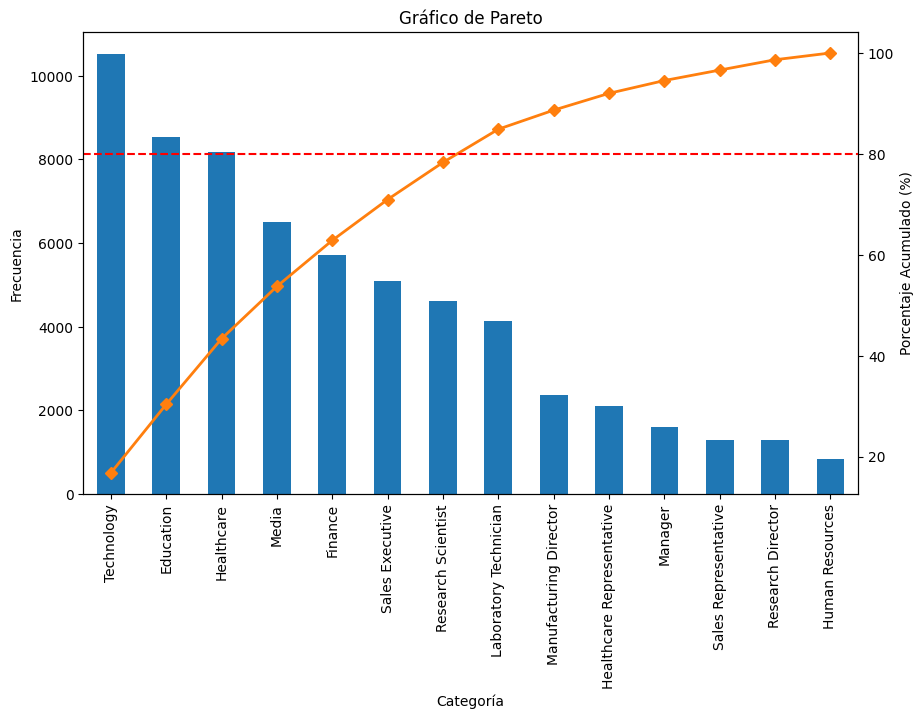

In [27]:
df_pareto = dfconcatenado['Rol de Trabajo'].value_counts()
pareto_cumulative = df_pareto.cumsum() / df_pareto.sum() * 100
fig, ax1 = plt.subplots(figsize=(10,6))
df_pareto.plot(kind='bar', ax=ax1, color='C0')
ax1.set_ylabel('Frecuencia')
ax1.set_xlabel('Categoría')
ax1.set_title('Gráfico de Pareto')
ax2 = ax1.twinx()
pareto_cumulative.plot(ax=ax2, color='C1', marker='D', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='red', linestyle='--')
plt.show()


## Observaciones
En este gráfico, las primeras 6 categorías (Technology, Education, Healthcare, Media, Finance, Sales Executive) parecen cubrir aproximadamente el 80% de la frecuencia total. Estas son las categorías más relevantes en el análisis y podrían considerarse el "punto de enfoque" si se busca priorizar esfuerzos o recursos. Las categorías restantes (a la derecha de la línea roja) tienen menos impacto en términos de frecuencia y podrían no ser tan prioritarias para el análisis o la acción.

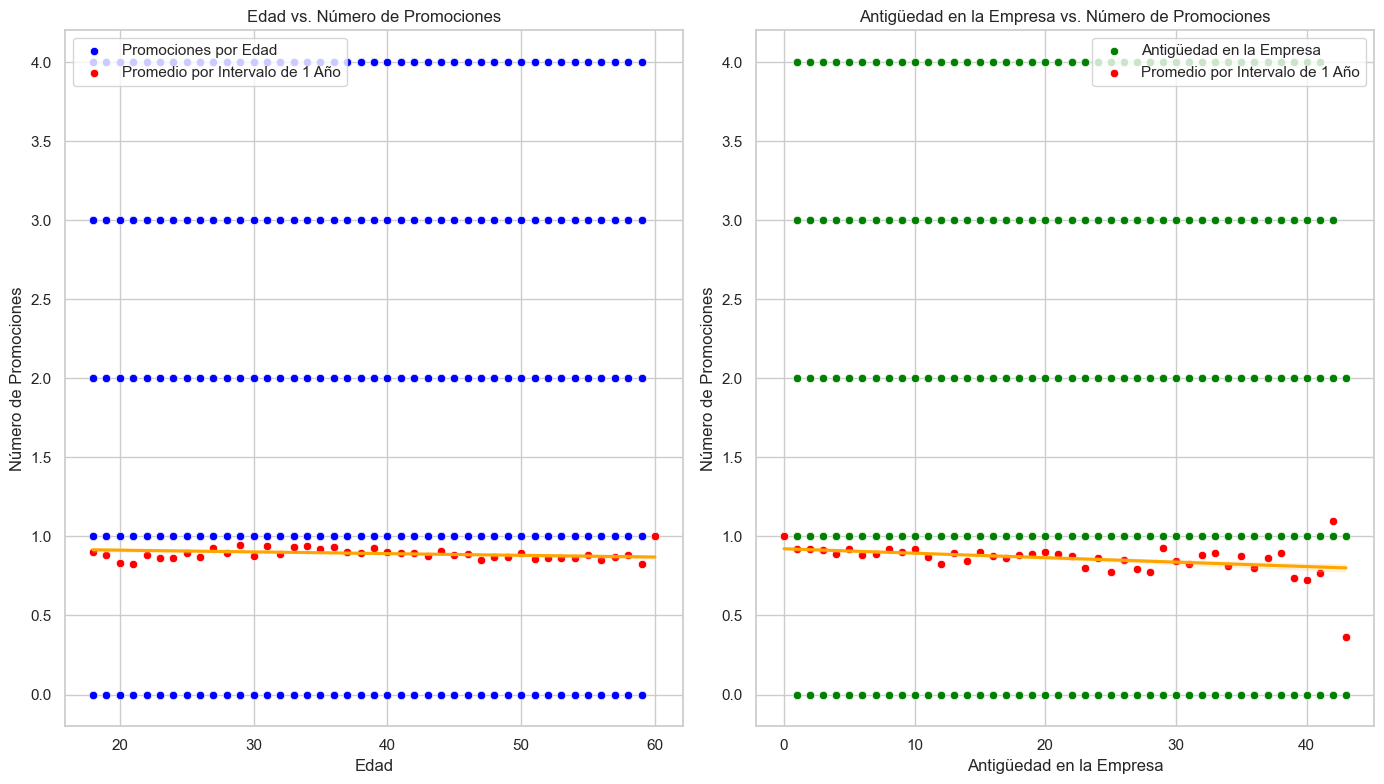

In [28]:
# Crear una nueva columna para los intervalos de 1 años
dfconcatenado['intervalo1'] = (dfconcatenado['Edad'] // 1) * 1
dfconcatenado['intervalo2'] = (dfconcatenado['Antigüedad en la Empresa'] // 1) * 1

# Agrupar por el intervalo y calcular el promedio de promociones por edad y por años en la empresa
promedios1 = dfconcatenado.groupby('intervalo1')['Número de Promociones'].mean().reset_index()
promedios2 = dfconcatenado.groupby('intervalo2')['Número de Promociones'].mean().reset_index()

sns.set_theme(style="whitegrid")

# Crea Primer gráfico: Edad vs. Promociones
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Edad', y='Número de Promociones', data=dfconcatenado, color='blue', label='Promociones por Edad')
sns.scatterplot(x='intervalo1', y='Número de Promociones', data=promedios1, color='red', label='Promedio por Intervalo de 1 Año')
# Añadir la línea de regresión
sns.regplot(x='Edad', y='Número de Promociones', data=dfconcatenado, scatter=False, color='orange', label='Línea de Regresión')
plt.title('Edad vs. Número de Promociones')
plt.xlabel('Edad')
plt.ylabel('Número de Promociones')

# Crea Segundo gráfico: Años en la empresa vs. Promociones
plt.subplot(1, 2, 2)
sns.scatterplot(x='Antigüedad en la Empresa', y='Número de Promociones', data=dfconcatenado, color='green', label='Antigüedad en la Empresa')
sns.scatterplot(x='intervalo2', y='Número de Promociones', data=promedios2, color='red', label='Promedio por Intervalo de 1 Año')
# Añadir la línea de regresión
sns.regplot(x='Antigüedad en la Empresa', y='Número de Promociones', data=dfconcatenado, scatter=False, color='orange', label='Línea de Regresión')
plt.title('Antigüedad en la Empresa vs. Número de Promociones')
plt.xlabel('Antigüedad en la Empresa')
plt.ylabel('Número de Promociones')

plt.tight_layout()
plt.show()

Estos dos gráficos de dispersión en 2D muestras las relaciones entre la edad, la antigüedad en la empresa y el número de promociones. La línea roja muestra la tendencia para ver visualmente si hay alguna correlación entre las variables. Las observaciones que se pueden realizar son que, en el gráfico de
Edad vs. Promociones no parece haber una correlación clara entre la edad y el número de promociones, ya que la línea de tendencia es plana y, en
Antigüedad en la Empresa vs. Promociones, hay una relación ligeramente negativa, lo que podría indicar que los empleados con más años en la empresa tienden a recibir menos promociones. Sin embargo, esta relación no parece ser muy pronunciada.

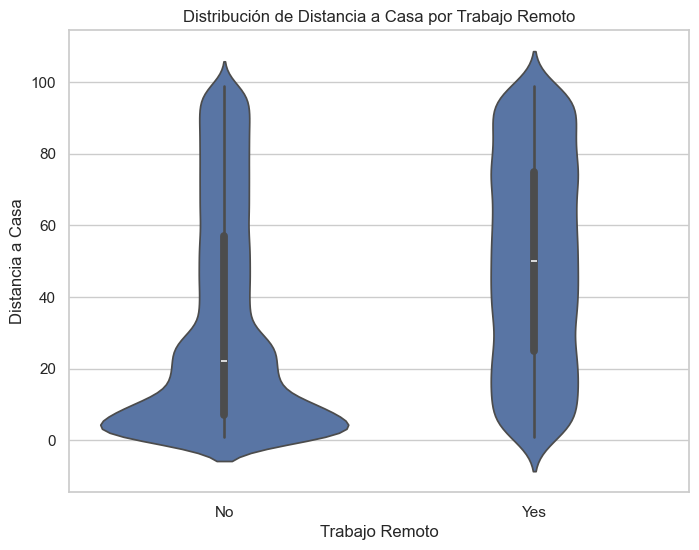

In [29]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Trabajo Remoto', y='Distancia a Casa', data=dfconcatenado)
plt.title('Distribución de Distancia a Casa por Trabajo Remoto')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Distancia a Casa')
plt.show()


En el gráfico de violín es un grafico muy similar al de caja, es este se puede apreciar que los empleados que trabajan de forma remota parecen vivir más lejos de su lugar de trabajo en promedio, ya que su mediana está más alta que la del grupo que no trabaja de forma remota. Los empleados que no trabajan de forma remota tienden a vivir más cerca, con la mayoría concentrados en distancias de hasta 20 km. Y por último, la distribución de la distancia a casa es más variada para aquellos que trabajan de forma remota, mientras que para los que no trabajan de forma remota, la mayoría de los empleados vive relativamente cerca.

## Comando para crear archivo .csv final

In [ ]:
dfconcatenado.to_csv('valores_convinados.csv', index=False)